In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set file path
file_path = "city_temperature.csv"
city_temp = pd.read_csv(file_path, low_memory=False)
# note: total rows 2,906,327 and 8 columns
city_temp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
# view data types
city_temp.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [4]:
# find empty cells in dataset
city_temp.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [5]:
# list the countries in dataset
list(city_temp["Country"].unique())

['Algeria',
 'Burundi',
 'Benin',
 'Central African Republic',
 'Congo',
 'Egypt',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Guinea',
 'Guinea-Bissau',
 'Ivory Coast',
 'Kenya',
 'Morocco',
 'Madagascar',
 'Mauritania',
 'Malawi',
 'Mozambique',
 'Namibia',
 'Nigeria',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Togo',
 'Tunisia',
 'Tanzania',
 'Uganda',
 'Zambia',
 'Bangladesh',
 'China',
 'Hong Kong',
 'India',
 'Indonesia',
 'Japan',
 'Kazakhstan',
 'Kyrgyzstan',
 'Laos',
 'Malaysia',
 'Mongolia',
 'Myanmar (Burma)',
 'Nepal',
 'North Korea',
 'Pakistan',
 'Philippines',
 'Singapore',
 'South Korea',
 'Sri Lanka',
 'Taiwan',
 'Tajikistan',
 'Thailand',
 'Turkmenistan',
 'Uzbekistan',
 'Vietnam',
 'Australia',
 'New Zealand',
 'Albania',
 'Austria',
 'Belarus',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Georgia',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Macedonia',
 'The Netherlands',


In [6]:
# list years in dataset
list(city_temp["Year"].unique())

[1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 201,
 200]

In [7]:
# assumption 1: remove year 2020 due to incomplete yearly data
city_temp_a1 = city_temp[city_temp["Year"] != 2020]
# note: total rows 2,867,517 and 8 rows
city_temp_a1.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [8]:
# review data associated with years '200' or '201'
data_200_201 = city_temp_a1[(city_temp_a1["Year"] == 200) |
                            (city_temp_a1["Year"] == 201)]
data_200_201

,Region,Country,State,City,Month,Day,Year,AvgTemperature
58178,Africa,Ethiopia,NaN,Addis Ababa,12,3,201,-99.0
58179,Africa,Ethiopia,NaN,Addis Ababa,12,4,201,-99.0
58180,Africa,Ethiopia,NaN,Addis Ababa,12,5,201,-99.0
58181,Africa,Ethiopia,NaN,Addis Ababa,12,6,201,-99.0
58182,Africa,Ethiopia,NaN,Addis Ababa,12,7,201,-99.0
...,...,...,...,...,...,...,...,...
1212427,North America,Mexico,NaN,Guadalajara,12,27,201,-99.0
1212428,North America,Mexico,NaN,Guadalajara,12,28,201,-99.0
1212429,North America,Mexico,NaN,Guadalajara,12,29,201,-99.0
1212430,North America,Mexico,NaN,Guadalajara,12,30,201,-99.0


In [9]:
# review data associated with years '200' and '201'
filtered_data_200_201 = data_200_201[data_200_201["AvgTemperature"] != -99]
filtered_data_200_201

,Region,Country,State,City,Month,Day,Year,AvgTemperature


In [10]:
# assumption 2: remove years '200' and '201' as data not deemed valuable
city_temp_a2 = city_temp_a1[(city_temp_a1["Year"] != 200) &
                           (city_temp_a1["Year"] != 201)]
# note: total rows 2,867,077 and 8 columns
city_temp_a2

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [11]:
# summary statistics for all cities/countries prior to grouping
city_temp_a2_stats = city_temp_a2["AvgTemperature"].describe()
city_temp_a2_stats

count    2.867077e+06
mean     5.605889e+01
std      3.220557e+01
min     -9.900000e+01
25%      4.590000e+01
50%      6.260000e+01
75%      7.560000e+01
max      1.100000e+02
Name: AvgTemperature, dtype: float64

In [12]:
# calculate yearly average temperature by country
country_year_temp = city_temp_a2.groupby(["Country", "Year"]).mean()
country_year_temp.head()

Month        Day  AvgTemperature
Country Year                                     
Albania 1995  6.526027  15.720548      -99.000000
        1996  6.513661  15.756831      -99.000000
        1997  6.526027  15.720548      -88.228767
        1998  6.526027  15.720548      -46.195890
        1999  6.526027  15.720548       26.696164

In [13]:
# summary statistics by for grouped df
country_year_temp_stats = country_year_temp["AvgTemperature"].describe()
country_year_temp_stats

count    2985.000000
mean       55.895788
std        29.428393
min       -99.000000
25%        49.577534
50%        60.920000
75%        74.097678
max        85.989315
Name: AvgTemperature, dtype: float64

In [14]:
# calculate lower and upper bounds for outliers
temp_IQR_a2 = city_temp_a2_stats["75%"] - city_temp_a2_stats["25%"]
lower_bound_a2 = city_temp_a2_stats["25%"] - 1.5*temp_IQR_a2
upper_bound_a2 = city_temp_a2_stats["75%"] + 1.5*temp_IQR_a2
print(lower_bound_a2, upper_bound_a2)

1.3500000000000014 120.14999999999999


In [15]:
# determine number of lower bound outliers
lower_bound_outliers_a2 = city_temp_a2[city_temp_a2["AvgTemperature"] < lower_bound_a2]
lower_bound_outliers_a2

,Region,Country,State,City,Month,Day,Year,AvgTemperature
220,Africa,Algeria,NaN,Algiers,8,9,1995,-99.0
221,Africa,Algeria,NaN,Algiers,8,10,1995,-99.0
408,Africa,Algeria,NaN,Algiers,2,13,1996,-99.0
409,Africa,Algeria,NaN,Algiers,2,14,1996,-99.0
1453,Africa,Algeria,NaN,Algiers,12,24,1998,-99.0
...,...,...,...,...,...,...,...,...
2905471,North America,US,Additional Territories,San Juan Puerto Rico,3,29,2011,-99.0
2905534,North America,US,Additional Territories,San Juan Puerto Rico,5,31,2011,-99.0
2905689,North America,US,Additional Territories,San Juan Puerto Rico,11,2,2011,-99.0
2905726,North America,US,Additional Territories,San Juan Puerto Rico,12,9,2011,-99.0


In [16]:
# lower bound outliers where AvgTemperature equals (-99)
lower_bound = lower_bound_outliers_a2[lower_bound_outliers_a2["AvgTemperature"] == -99]
lower_bound.count()

Region            79164
Country           79164
State              4779
City              79164
Month             79164
Day               79164
Year              79164
AvgTemperature    79164
dtype: int64

In [17]:
# determine number of upper bound outliers
upper_bound_outliers_a2 = city_temp_a2[city_temp_a2["AvgTemperature"] > upper_bound_a2]
upper_bound_outliers_a2

,Region,Country,State,City,Month,Day,Year,AvgTemperature


In [18]:
# assumption 3: remove lower bound outliers that equal (-99)
city_temp_a3 = city_temp_a2[city_temp_a2["AvgTemperature"] != -99]
city_temp_a3.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [19]:
# rerun summary statistics
city_temp_a3_stats = city_temp_a3["AvgTemperature"].describe()
city_temp_a3_stats

count    2.787913e+06
mean     6.046185e+01
std      1.909307e+01
min     -5.000000e+01
25%      4.750000e+01
50%      6.340000e+01
75%      7.600000e+01
max      1.100000e+02
Name: AvgTemperature, dtype: float64

In [20]:
# re-calculate lower and upper bounds for outliers
temp_IQR_a3 = city_temp_a3_stats["75%"] - city_temp_a3_stats["25%"]
lower_bound_a3 = city_temp_a3_stats["25%"] - 1.5*temp_IQR_a3
upper_bound_a3 = city_temp_a3_stats["75%"] + 1.5*temp_IQR_a3
print(lower_bound_a3, upper_bound_a3)

4.75 118.75


In [21]:
# determine number of lower bound outliers
lower_bound_outliers_a3 = city_temp_a3[city_temp_a3["AvgTemperature"] < lower_bound_a3]
lower_bound_outliers_a3

,Region,Country,State,City,Month,Day,Year,AvgTemperature
294371,Asia,China,NaN,Shenyang,1,15,1996,3.5
294372,Asia,China,NaN,Shenyang,1,16,1996,-1.4
294388,Asia,China,NaN,Shenyang,2,1,1996,4.3
294395,Asia,China,NaN,Shenyang,2,8,1996,4.6
294396,Asia,China,NaN,Shenyang,2,9,1996,3.4
...,...,...,...,...,...,...,...,...
2898726,North America,US,Wyoming,Cheyenne,2,20,2018,0.9
2899041,North America,US,Wyoming,Cheyenne,1,1,2019,-0.2
2899078,North America,US,Wyoming,Cheyenne,2,7,2019,-1.7
2899102,North America,US,Wyoming,Cheyenne,3,3,2019,-2.0


In [22]:
# view cities with average temperature below lower bound
lower_bound_outliers_a3["City"].unique()

array(['Shenyang', 'Sapporo', 'Almaty', 'Bishkek', 'Ulan-bator',
       'Pyongyang', 'Seoul', 'Tashkent', 'Vienna', 'Minsk', 'Sofia',
       'Prague', 'Helsinki', 'Bonn', 'Munich', 'Riga', 'Skopje', 'Oslo',
       'Warsaw', 'Bucharest', 'Moscow', 'Yerevan', 'Pristina',
       'Stockholm', 'Bern', 'Kiev', 'Belgrade', 'Ankara', 'Calgary',
       'Edmonton', 'Halifax', 'Montreal', 'Ottawa', 'Quebec', 'Regina',
       'Toronto', 'Winnipeg', 'Anchorage', 'Fairbanks', 'Juneau',
       'Colorado Springs', 'Denver', 'Grand Junction', 'Pueblo',
       'Bridgeport', 'Hartford Springfield', 'Boise', 'Pocatello',
       'Chicago', 'Peoria', 'Rockford', 'Springfield', 'Evansville',
       'Fort Wayne', 'Indianapolis', 'South Bend', 'Des Moines',
       'Sioux City', 'Goodland', 'Topeka', 'Wichita', 'Lexington',
       'Louisville', 'Paducah', 'Caribou', 'Portland', 'Boston',
       'Detroit', 'Flint', 'Grand Rapids', 'Lansing', 'Sault Ste Marie',
       'Duluth', 'Minneapolis St. Paul', 'Kansas Cit

In [23]:
# determine number of upper bound outliers
upper_bound_outliers_a3 = city_temp_a3[city_temp_a3["AvgTemperature"] > upper_bound_a3]
upper_bound_outliers_a3

,Region,Country,State,City,Month,Day,Year,AvgTemperature


In [24]:
# calculate monthly average temperature by country
country_month_temp = city_temp_a3.groupby(["Country", "City", "Year", "Month"], sort=False).mean()
country_month_temp = country_month_temp.reset_index()
country_month_temp.head()

,Country,City,Year,Month,Day,AvgTemperature
0,Algeria,Algiers,1995,1,16.0,51.419355
1,Algeria,Algiers,1995,2,14.5,54.800000
2,Algeria,Algiers,1995,3,16.0,55.000000
3,Algeria,Algiers,1995,4,15.5,57.193333
4,Algeria,Algiers,1995,5,16.0,67.409677


In [48]:
# set file path
file_path = "owid-co2-data.csv"
fossil_df = pd.read_csv(file_path, low_memory=False)
# note: total rows 25,989 and 60 columns
fossil_df

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25984,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226
25985,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093
25986,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091
25987,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,49.427,3374.877,NaN


In [56]:
# remove year 2020 from dataframe
algeria_cement = fossil_df[fossil_df["country"] == "Algeria"]                         
algeria_cement

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
297,DZA,Algeria,1916,0.004,0.001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5615995.0,NaN,NaN,NaN,NaN
298,DZA,Algeria,1917,0.007,0.001,NaN,NaN,NaN,0.004,0.001,...,NaN,NaN,NaN,NaN,NaN,5643659.0,NaN,NaN,NaN,NaN
299,DZA,Algeria,1918,0.018,0.003,NaN,NaN,NaN,0.015,0.003,...,NaN,NaN,NaN,NaN,NaN,5672196.0,NaN,NaN,NaN,NaN
300,DZA,Algeria,1919,0.018,0.003,NaN,NaN,NaN,0.015,0.003,...,NaN,NaN,NaN,NaN,NaN,5707777.0,NaN,NaN,NaN,NaN
301,DZA,Algeria,1920,0.022,0.004,NaN,NaN,NaN,0.018,0.003,...,NaN,NaN,NaN,NaN,NaN,5750516.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,DZA,Algeria,2016,148.929,3.673,NaN,9.356,0.231,NaN,NaN,...,5.173,49.42,1.219,11.91,0.294,40551398.0,5.746961e+11,616.941,15213.811,1.074
398,DZA,Algeria,2017,154.936,3.743,NaN,10.710,0.259,0.795,0.019,...,5.118,49.60,1.198,12.07,0.292,41389174.0,5.821672e+11,623.701,15069.188,1.071
399,DZA,Algeria,2018,161.487,3.824,NaN,10.749,0.255,1.330,0.032,...,5.184,49.55,1.173,12.11,0.287,42228415.0,5.903176e+11,671.055,15891.068,1.137
400,DZA,Algeria,2019,166.642,3.871,NaN,10.749,0.250,1.099,0.026,...,NaN,NaN,NaN,NaN,NaN,43053054.0,NaN,695.143,16146.190,NaN


In [26]:
# rename df columns inline with city_temp df
fossil_df.rename(columns={"country":"Country", "year":"Year"}, inplace=True)
fossil_df

,iso_code,Country,Year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25984,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226
25985,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093
25986,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091
25987,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,49.427,3374.877,NaN


In [40]:
# calculate totals by emission type (million metric tons of C)
cement_total = fossil_df["cement_co2"].sum()
trade_total = fossil_df["trade_co2"].sum()
coal_total = fossil_df["coal_co2"].sum()
flaring_total = fossil_df["flaring_co2"].sum()
gas_total = fossil_df["gas_co2"].sum()
oil_total = fossil_df["oil_co2"].sum()
other_total = fossil_df["other_industry_co2"].sum()
co2_total = fossil_df["co2"].sum()
print(f'cement total: {cement_total}, trade total: {trade_total}, coal total: {coal_total}, flaring total: {flaring_total}, gas total: {gas_total}, oil total: {oil_total}, other total: {other_total}, co2 total: {co2_total}') 

cement total: 200833.887, trade total: -33277.830000000016, coal total: 3802023.0810000002, flaring total: 82108.447, gas total: 1204482.216, oil total: 2726745.83, other total: 40841.07, co2 total: 8058661.454999999


In [27]:
# merge dataframes
main_df = pd.merge(country_month_temp, fossil_df, on=["Country", "Year"])
main_df["co2"] = main_df["co2"].apply(lambda x: x*.0833)
main_df

,Country,City,Year,Month,Day,AvgTemperature,iso_code,co2,co2_per_capita,trade_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,Algeria,Algiers,1995,1,16.0,51.419355,DZA,7.911917,3.303,NaN,...,3.582,25.72,0.894,4.2,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159
1,Algeria,Algiers,1995,2,14.5,54.800000,DZA,7.911917,3.303,NaN,...,3.582,25.72,0.894,4.2,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159
2,Algeria,Algiers,1995,3,16.0,55.000000,DZA,7.911917,3.303,NaN,...,3.582,25.72,0.894,4.2,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159
3,Algeria,Algiers,1995,4,15.5,57.193333,DZA,7.911917,3.303,NaN,...,3.582,25.72,0.894,4.2,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159
4,Algeria,Algiers,1995,5,16.0,67.409677,DZA,7.911917,3.303,NaN,...,3.582,25.72,0.894,4.2,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43715,Venezuela,Caracas,2019,8,16.0,81.951613,VEN,8.261278,3.478,21.369,...,NaN,NaN,NaN,NaN,NaN,28515829.0,NaN,541.504,18989.611,NaN
43716,Venezuela,Caracas,2019,9,15.5,81.140000,VEN,8.261278,3.478,21.369,...,NaN,NaN,NaN,NaN,NaN,28515829.0,NaN,541.504,18989.611,NaN
43717,Venezuela,Caracas,2019,10,16.0,80.858065,VEN,8.261278,3.478,21.369,...,NaN,NaN,NaN,NaN,NaN,28515829.0,NaN,541.504,18989.611,NaN
43718,Venezuela,Caracas,2019,11,15.5,80.693333,VEN,8.261278,3.478,21.369,...,NaN,NaN,NaN,NaN,NaN,28515829.0,NaN,541.504,18989.611,NaN


In [28]:
main_df["City"].value_counts()

Algiers       300
Milan         300
Geneva        300
Bern          300
Stockholm     300
             ... 
Frankfurt     127
Georgetown    121
Yerevan       106
Bonn           96
Bujumbura      71
Name: City, Length: 158, dtype: int64

In [29]:
main_df["Date"] = pd.to_datetime(main_df[["Year", "Month"]].assign(DAY=1))
main_df

,Country,City,Year,Month,Day,AvgTemperature,iso_code,co2,co2_per_capita,trade_co2,...,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,Date
0,Algeria,Algiers,1995,1,16.0,51.419355,DZA,7.911917,3.303,NaN,...,25.72,0.894,4.2,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159,1995-01-01
1,Algeria,Algiers,1995,2,14.5,54.800000,DZA,7.911917,3.303,NaN,...,25.72,0.894,4.2,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159,1995-02-01
2,Algeria,Algiers,1995,3,16.0,55.000000,DZA,7.911917,3.303,NaN,...,25.72,0.894,4.2,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159,1995-03-01
3,Algeria,Algiers,1995,4,15.5,57.193333,DZA,7.911917,3.303,NaN,...,25.72,0.894,4.2,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159,1995-04-01
4,Algeria,Algiers,1995,5,16.0,67.409677,DZA,7.911917,3.303,NaN,...,25.72,0.894,4.2,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159,1995-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43715,Venezuela,Caracas,2019,8,16.0,81.951613,VEN,8.261278,3.478,21.369,...,NaN,NaN,NaN,NaN,28515829.0,NaN,541.504,18989.611,NaN,2019-08-01
43716,Venezuela,Caracas,2019,9,15.5,81.140000,VEN,8.261278,3.478,21.369,...,NaN,NaN,NaN,NaN,28515829.0,NaN,541.504,18989.611,NaN,2019-09-01
43717,Venezuela,Caracas,2019,10,16.0,80.858065,VEN,8.261278,3.478,21.369,...,NaN,NaN,NaN,NaN,28515829.0,NaN,541.504,18989.611,NaN,2019-10-01
43718,Venezuela,Caracas,2019,11,15.5,80.693333,VEN,8.261278,3.478,21.369,...,NaN,NaN,NaN,NaN,28515829.0,NaN,541.504,18989.611,NaN,2019-11-01


In [30]:
main_df["Date"] = main_df["Date"].dt.date

In [31]:
df_list = [d for _, d in main_df.groupby(["City"])]
df_list[0].head(2)

,Country,City,Year,Month,Day,AvgTemperature,iso_code,co2,co2_per_capita,trade_co2,...,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,Date
33359,United Arab Emirates,Abu Dhabi,1995,1,16.0,65.941935,ARE,5.832,28.989,7.558,...,14.79,6.124,2.3,0.952,2415099.0,7.535718e+10,484.871,200766.513,6.434,1995-01-01
33360,United Arab Emirates,Abu Dhabi,1995,2,14.5,68.600000,ARE,5.832,28.989,7.558,...,14.79,6.124,2.3,0.952,2415099.0,7.535718e+10,484.871,200766.513,6.434,1995-02-01


In [33]:
# calculate yearly average temperature by country
country_year_temp = city_temp_a3.groupby(["Country", "City", "Year"], sort=False).mean()
country_year_temp = country_year_temp.reset_index()
country_year_temp.head()

,Country,City,Year,Month,Day,AvgTemperature
0,Algeria,Algiers,1995,6.517906,15.754821,64.410468
1,Algeria,Algiers,1996,6.538462,15.769231,63.530220
2,Algeria,Algiers,1997,6.526027,15.720548,64.926301
3,Algeria,Algiers,1998,6.465374,15.590028,63.619668
4,Algeria,Algiers,1999,6.541209,15.736264,64.923626


In [34]:
# merge df based on yearly temperature averages
main_year_df = pd.merge(country_year_temp, fossil_df, on=["Country", "Year"])
main_year_df = main_year_df.drop(columns=["Month"])
main_year_df

,Country,City,Year,Day,AvgTemperature,iso_code,co2,co2_per_capita,trade_co2,cement_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,Algeria,Algiers,1995,15.754821,64.410468,DZA,94.981,3.303,NaN,3.165,...,3.582,25.72,0.894,4.20,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159
1,Algeria,Algiers,1996,15.769231,63.530220,DZA,96.786,3.307,NaN,3.006,...,3.564,28.51,0.974,4.31,0.147,29266415.0,1.565791e+11,309.901,10588.948,1.979
2,Algeria,Algiers,1997,15.720548,64.926301,DZA,87.005,2.925,NaN,3.271,...,3.646,31.24,1.050,4.18,0.141,29742980.0,1.646445e+11,297.846,10014.004,1.809
3,Algeria,Algiers,1998,15.590028,63.619668,DZA,106.621,3.531,NaN,3.446,...,3.768,34.23,1.134,4.75,0.157,30192750.0,1.799629e+11,308.310,10211.407,1.713
4,Algeria,Algiers,1999,15.736264,64.923626,DZA,91.668,2.993,NaN,3.435,...,3.910,37.20,1.215,4.68,0.153,30623406.0,1.931798e+11,311.398,10168.621,1.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,Venezuela,Caracas,2015,15.658402,81.461433,VEN,180.124,5.988,13.700,3.237,...,9.008,75.90,2.523,13.34,0.443,30081827.0,5.589242e+11,953.305,31690.397,1.706
3692,Venezuela,Caracas,2016,15.628834,81.707055,VEN,169.477,5.677,12.631,2.879,...,8.629,73.95,2.477,13.52,0.453,29851249.0,4.564771e+11,830.519,27821.904,1.819
3693,Venezuela,Caracas,2017,15.947214,82.844575,VEN,161.536,5.494,14.166,3.166,...,8.284,72.54,2.467,13.08,0.445,29402480.0,3.849426e+11,812.527,27634.648,2.111
3694,Venezuela,Caracas,2018,15.914286,79.969714,VEN,120.177,4.160,21.858,2.760,...,8.098,72.44,2.508,13.65,0.473,28887117.0,3.094130e+11,687.015,23782.734,2.220


In [55]:
algeria_cement2 = main_year_df[main_year_df["Country"] == "Algeria"]
algeria_cement2

,Country,City,Year,Day,AvgTemperature,iso_code,co2,co2_per_capita,trade_co2,cement_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,Algeria,Algiers,1995,15.754821,64.410468,DZA,94.981,3.303,NaN,3.165,...,3.582,25.72,0.894,4.20,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159
1,Algeria,Algiers,1996,15.769231,63.530220,DZA,96.786,3.307,NaN,3.006,...,3.564,28.51,0.974,4.31,0.147,29266415.0,1.565791e+11,309.901,10588.948,1.979
2,Algeria,Algiers,1997,15.720548,64.926301,DZA,87.005,2.925,NaN,3.271,...,3.646,31.24,1.050,4.18,0.141,29742980.0,1.646445e+11,297.846,10014.004,1.809
3,Algeria,Algiers,1998,15.590028,63.619668,DZA,106.621,3.531,NaN,3.446,...,3.768,34.23,1.134,4.75,0.157,30192750.0,1.799629e+11,308.310,10211.407,1.713
4,Algeria,Algiers,1999,15.736264,64.923626,DZA,91.668,2.993,NaN,3.435,...,3.910,37.20,1.215,4.68,0.153,30623406.0,1.931798e+11,311.398,10168.621,1.612
5,Algeria,Algiers,2000,15.756831,64.182787,DZA,82.221,2.649,NaN,3.789,...,4.071,40.16,1.294,7.56,0.244,31042238.0,2.085541e+11,299.936,9662.189,1.438
6,Algeria,Algiers,2001,15.720548,64.669863,DZA,83.780,2.664,NaN,3.766,...,3.965,41.65,1.324,7.57,0.241,31451513.0,2.234203e+11,310.801,9881.899,1.391
7,Algeria,Algiers,2002,15.678670,64.135457,DZA,89.407,2.807,NaN,4.058,...,4.142,43.18,1.356,7.39,0.232,31855110.0,2.453609e+11,321.940,10106.399,1.312
8,Algeria,Algiers,2003,15.728022,65.493407,DZA,91.048,2.822,NaN,4.032,...,4.268,45.03,1.396,7.65,0.237,32264159.0,2.735686e+11,336.876,10441.169,1.231
9,Algeria,Algiers,2004,15.756831,64.087432,DZA,87.853,2.687,NaN,4.897,...,4.331,46.90,1.435,8.29,0.254,32692153.0,2.967736e+11,349.734,10697.796,1.178


In [35]:
main_year_df.columns

Index(['Country', 'City', 'Year', 'Day', 'AvgTemperature', 'iso_code', 'co2',
       'co2_per_capita', 'trade_co2', 'cement_co2', 'cement_co2_per_capita',
       'coal_co2', 'coal_co2_per_capita', 'flaring_co2',
       'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'other_industry_co2', 'other_co2_per_capita',
       'co2_growth_prct', 'co2_growth_abs', 'co2_per_gdp',
       'co2_per_unit_energy', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_co2', 'cumulative_cement_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'trade_co2_share',
       'share_global_co2', 'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'share_global_cumulative_co2', 'share_global_cumulative_cement_co2',


In [36]:
df_list2 = [d for _, d in main_year_df.groupby(['City'])]
df_list2[0].head(2)

,Country,City,Year,Day,AvgTemperature,iso_code,co2,co2_per_capita,trade_co2,cement_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
2818,United Arab Emirates,Abu Dhabi,1995,15.720548,80.678082,ARE,70.012,28.989,7.558,2.379,...,37.589,14.79,6.124,2.30,0.952,2415099.0,7.535718e+10,484.871,200766.513,6.434
2820,United Arab Emirates,Abu Dhabi,1996,15.756831,81.808197,ARE,72.775,28.662,7.088,2.393,...,37.844,16.55,6.518,2.62,1.032,2539121.0,8.633565e+10,499.688,196795.632,5.788


In [37]:
# calculate totals by emission type (million metric tons of C)
cement_total = main_year_df["cement_co2"].sum()
trade_total = main_year_df["trade_co2"].sum()
coal_total = main_year_df["coal_co2"].sum()
flaring_total = main_year_df["flaring_co2"].sum()
gas_total = main_year_df["gas_co2"].sum()
oil_total = main_year_df["oil_co2"].sum()
other_total = main_year_df["other_industry_co2"].sum()
co2_total = main_year_df["co2"].sum()
print(f'cement total: {cement_total}, trade total: {trade_total}, coal total: {coal_total}, flaring total: {flaring_total}, gas total: {gas_total}, oil total: {oil_total}, other total: {other_total}, co2 total: {co2_total}') 

cement total: 89164.28199999998, trade total: -81418.31499999997, coal total: 919398.27, flaring total: 11659.791000000001, gas total: 213952.161, oil total: 464958.257, other total: 20635.317, co2 total: 1719768.08


In [39]:
# create df for emissions only
len(main_year_df["cement_co2"])

3696

In [64]:
algeria_df = main_year_df[main_year_df["Country"] == "Algeria"]
algeria_df.head()

,Country,City,Year,Day,AvgTemperature,iso_code,co2,co2_per_capita,trade_co2,cement_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,Algeria,Algiers,1995,15.754821,64.410468,DZA,94.981,3.303,NaN,3.165,...,3.582,25.72,0.894,4.20,0.146,28757788.0,1.450547e+11,313.110,10887.842,2.159
1,Algeria,Algiers,1996,15.769231,63.530220,DZA,96.786,3.307,NaN,3.006,...,3.564,28.51,0.974,4.31,0.147,29266415.0,1.565791e+11,309.901,10588.948,1.979
2,Algeria,Algiers,1997,15.720548,64.926301,DZA,87.005,2.925,NaN,3.271,...,3.646,31.24,1.050,4.18,0.141,29742980.0,1.646445e+11,297.846,10014.004,1.809
3,Algeria,Algiers,1998,15.590028,63.619668,DZA,106.621,3.531,NaN,3.446,...,3.768,34.23,1.134,4.75,0.157,30192750.0,1.799629e+11,308.310,10211.407,1.713
4,Algeria,Algiers,1999,15.736264,64.923626,DZA,91.668,2.993,NaN,3.435,...,3.910,37.20,1.215,4.68,0.153,30623406.0,1.931798e+11,311.398,10168.621,1.612


In [71]:
algeria_2016 = algeria_df.filter(["year", "coal_co2"])
algeria_2016

,coal_co2
0,1.935
1,1.407
2,1.381
3,2.110
4,2.173
5,1.960
6,2.096
7,2.609
8,2.788
9,1.924


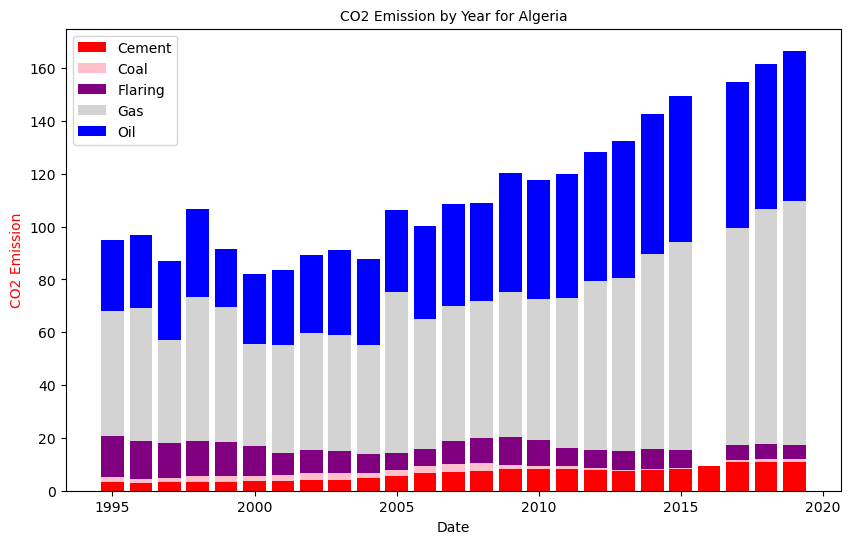

In [85]:
# bar graph emissions by type for Algeria
fig, ax=plt.subplots(figsize=(10,6))

ax.bar(algeria_df.Year,algeria_df.cement_co2,color='red', label='Cement')
ax.bar(algeria_df.Year,algeria_df.coal_co2,bottom=algeria_df.cement_co2,color='pink', label='Coal')
ax.bar(algeria_df.Year,algeria_df.flaring_co2,bottom=algeria_df.cement_co2+algeria_df.coal_co2,color='purple', label='Flaring')
ax.bar(algeria_df.Year,algeria_df.gas_co2,bottom=algeria_df.cement_co2+algeria_df.coal_co2+algeria_df.flaring_co2,color='lightgray', label='Gas')
ax.bar(algeria_df.Year,algeria_df.oil_co2,bottom=algeria_df.cement_co2+algeria_df.coal_co2+algeria_df.flaring_co2+algeria_df.gas_co2,color='blue', label='Oil')

ax.set_title('CO2 Emission by Year for Algeria', fontsize=10)
ax.set_xlabel('Date',fontsize=10)
ax.set_ylabel('CO2 Emission',color='red',fontsize=10)
ax.legend()
plt.show()

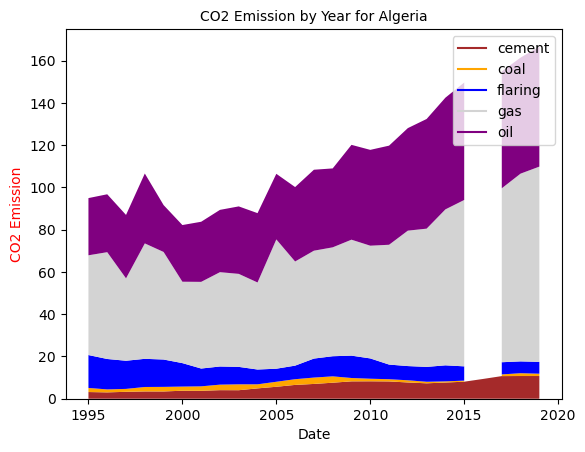

In [90]:
# stackplot emissions by type for Algeria
year = algeria_df.Year
cement = algeria_df.cement_co2
coal = algeria_df.coal_co2
flaring = algeria_df.flaring_co2
gas = algeria_df.gas_co2
oil = algeria_df.oil_co2

plt.plot([], [], color='brown', label='cement')
plt.plot([], [], color='orange', label='coal')
plt.plot([], [], color='blue', label='flaring')
plt.plot([], [], color='lightgray', label='gas')
plt.plot([], [], color='purple', label='oil')

plt.stackplot(year, cement, coal, flaring, gas, oil, baseline='zero', colors=['brown', 'orange', 'blue', 'lightgray', 'purple'])

plt.title('CO2 Emission by Year for Algeria', fontsize=10)
plt.xlabel('Date',fontsize=10)
plt.ylabel('CO2 Emission',color='red',fontsize=10)
plt.legend()
plt.show()

In [104]:
# create df to group years
year_df = main_year_df.groupby(["Year"]).sum()
year_df = year_df.reset_index()
year_df.head()

,Year,Day,AvgTemperature,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,1995,2394.811022,9720.206262,48263.793,1018.327,-430.032,1737.528,23.827,22946.610,234.224,...,1361.151,14185.30,327.343,5501.06,127.924,1.471643e+10,1.022116e+14,206593.075,5374126.766,339.677
1,1996,2412.121575,9706.185052,49899.537,1023.301,-615.055,1801.311,23.668,23563.626,233.160,...,1363.472,14369.71,319.543,5656.55,124.098,1.495414e+10,1.071624e+14,213330.844,5319963.707,328.259
2,1997,2443.582875,9968.081928,50160.736,1040.721,-843.059,1876.220,23.775,23363.613,236.577,...,1368.615,14503.81,318.254,5516.18,123.224,1.515118e+10,1.110840e+14,215559.500,5423634.111,325.259
3,1998,2428.733544,10058.276198,49536.964,1030.467,-889.209,1911.016,24.346,22443.204,234.203,...,1374.674,14671.33,315.063,5613.03,123.809,1.543378e+10,1.137386e+14,216901.259,5465401.299,318.175
4,1999,2429.856226,9991.137204,50150.634,1024.197,-743.157,2030.558,24.486,22241.777,230.150,...,1372.823,14705.77,308.104,5654.93,123.197,1.562033e+10,1.179417e+14,221928.044,5509552.547,309.322


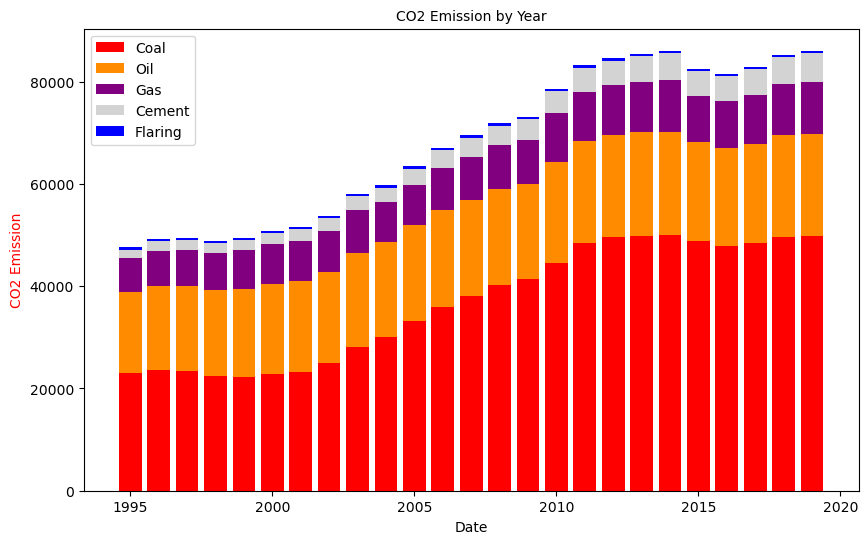

In [108]:
# create graph for yearly temperature averages
fig, ax=plt.subplots(figsize=(10,6))

ax.bar(year_df.Year,year_df.coal_co2,color='red', label='Coal')
ax.bar(year_df.Year,year_df.oil_co2,bottom=year_df.coal_co2,color='darkorange', label='Oil')
ax.bar(year_df.Year,year_df.gas_co2,bottom=year_df.coal_co2+year_df.oil_co2,color='purple', label='Gas')
ax.bar(year_df.Year,year_df.cement_co2,bottom=year_df.coal_co2+year_df.oil_co2+year_df.gas_co2,color='lightgray', label='Cement')
ax.bar(year_df.Year,year_df.flaring_co2,bottom=year_df.coal_co2+year_df.oil_co2+year_df.gas_co2+year_df.cement_co2,color='blue', label='Flaring')

ax.set_title('Total CO2 Emission by Year', fontsize=10)
ax.set_xlabel('Date',fontsize=10)
ax.set_ylabel('CO2 Emission',color='red',fontsize=10)
ax.legend()
plt.show()

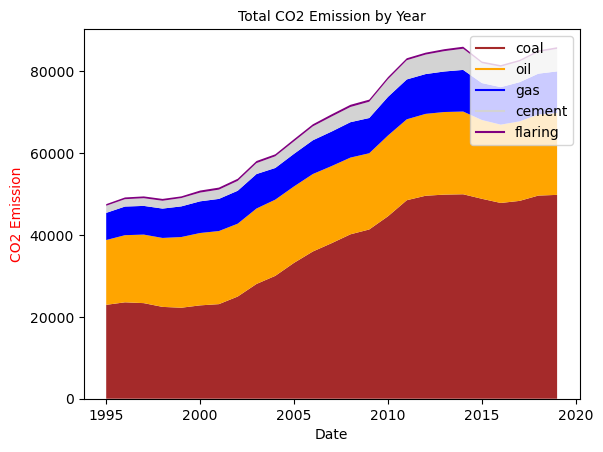

In [112]:
# stackplot total emissions by type
year = year_df.Year
cement = year_df.cement_co2
coal = year_df.coal_co2
flaring = year_df.flaring_co2
gas = year_df.gas_co2
oil = year_df.oil_co2

plt.plot([], [], color='brown', label='coal')
plt.plot([], [], color='orange', label='oil')
plt.plot([], [], color='blue', label='gas')
plt.plot([], [], color='lightgray', label='cement')
plt.plot([], [], color='purple', label='flaring')

plt.stackplot(year, coal, oil, gas, cement, flaring, baseline='zero', colors=['brown', 'orange', 'blue', 'lightgray', 'purple'])

plt.title('Total CO2 Emission by Year', fontsize=10)
plt.xlabel('Date',fontsize=10)
plt.ylabel('CO2 Emission',color='red',fontsize=10)
plt.legend()
plt.show()